In [2]:
import pandas as pd
import sqlite3
import pandas as pd

## Connect to sqlite database with players data

In [3]:
cnx = sqlite3.connect('Database/fpa-database.db')

df_players = pd.read_sql_query("SELECT * FROM players_transfermarkt", cnx)
print(df_players)

      id      player_name        date_of_birth player_position    nationality  \
0      1          Ederson  1993-08-17 00:00:00      Goalkeeper         Brazil   
1      2     Zack Steffen  1995-04-02 00:00:00      Goalkeeper  United States   
2      3     Scott Carson  1985-09-03 00:00:00      Goalkeeper        England   
3      4       Rúben Dias  1997-05-14 00:00:00     Centre-Back       Portugal   
4      5  Aymeric Laporte  1994-05-27 00:00:00     Centre-Back         France   
..   ...              ...                  ...             ...            ...   
511  512     Karlan Grant  1997-09-18 00:00:00  Centre-Forward        England   
512  513  Callum Robinson  1995-02-02 00:00:00  Centre-Forward        Ireland   
513  514     Mbaye Diagne  1991-10-28 00:00:00  Centre-Forward        Senegal   
514  515   Kenneth Zohore  1994-01-31 00:00:00  Centre-Forward        Denmark   
515  516  Hal Robson-Kanu  1989-05-21 00:00:00  Centre-Forward          Wales   

     current_value         

In [4]:
# Lista pozycji
positions = df_players.player_position.unique()
positions

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Centre-Forward', 'Right Midfield',
       'Left Midfield', 'Second Striker'], dtype=object)

In [5]:
df_players_best_players_for_position = pd.read_sql_query("SELECT max(current_value), current_club_id, player_position FROM players_transfermarkt group by current_club_id, player_position", cnx)
# if (cnx): cnx.close()

print(df_players_best_players_for_position)

     max(current_value) current_club_id     player_position
0                 100.0               1  Attacking Midfield
1                  70.0               1    Central Midfield
2                  70.0               1         Centre-Back
3                  60.0               1      Centre-Forward
4                  70.0               1  Defensive Midfield
..                  ...             ...                 ...
196                10.0               9          Goalkeeper
197                35.0               9         Left Winger
198                20.0               9           Left-Back
199                35.0               9        Right Winger
200                32.0               9          Right-Back

[201 rows x 3 columns]


### Joining data from Fantasy Premier League

In [6]:
players_with_values = pd.read_sql_query("SELECT * from players as p " + \
                                        "JOIN players_transfermarkt_fpl as ptf on ptf.player_id_fpl = p.guid " + \
                                        "JOIN players_transfermarkt as pt on pt.id = ptf.player_id_transfermarkt " +
                                        "JOIN player_statistics as ps on ps.guid = p.guid " +
                                        "JOIN player_values as pv on pv.transfermarkt_player_id = pt.id " +
                                        "WHERE strftime('%Y',pv.date_stamp) = ps.year", cnx)

In [7]:
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,yellow_cards,selected_by_percent,year,now_cost,element_type,id,transfermarkt_player_id,date_stamp,player_value,player_club
0,Paul,Pogba,502,75,94,502,94,Paul Pogba,1993-03-15 00:00:00,Central Midfield,...,7,7.3,2016,NaN,None,5,94,2016-04-01 00:00:00,65000000,Juventus FC
1,Wilfred,Ndidi,627,138,173,627,173,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,...,0,0.7,2016,NaN,None,19,173,2016-04-14 00:00:00,2000000,KRC Genk
2,Nathaniel,Phillips,1179,23,33,1179,33,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,...,2,2.9,2020,41.0,DEF,32,33,2020-04-02 00:00:00,1000000,VfB Stuttgart
3,Andrew,Robertson,151,25,35,151,35,Andrew Robertson,1994-03-11 00:00:00,Left-Back,...,5,1.9,2016,NaN,None,38,35,2016-04-20 00:00:00,6000000,Hull City
4,Lee,Grant,573,65,83,573,83,Lee Grant,1983-01-27 00:00:00,Goalkeeper,...,1,6.5,2016,NaN,None,39,83,2016-04-20 00:00:00,500000,Derby County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,Kevin,De Bruyne,234,13,18,234,18,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,...,3,48.9,2019,106.0,None,9665,18,2019-12-10 00:00:00,150000000,Manchester City
3514,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,33.9,2018,132.0,None,9666,50,2018-05-28 00:00:00,150000000,Liverpool FC
3515,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,33.9,2018,132.0,None,9667,50,2018-12-19 00:00:00,150000000,Liverpool FC
3516,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,32.4,2019,125.0,None,9668,50,2019-06-13 00:00:00,150000000,Liverpool FC


In [9]:
players_with_values.columns

Index(['first_name', 'second_name', 'guid', 'id', 'player_id_transfermarkt',
       'player_id_fpl', 'id', 'player_name', 'date_of_birth',
       'player_position', 'nationality', 'current_value', 'url',
       'current_club_id', 'guid', 'first_name', 'second_name', 'goals_scored',
       'assists', 'total_points', 'minutes', 'goals_conceded', 'creativity',
       'influence', 'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets',
       'red_cards', 'yellow_cards', 'selected_by_percent', 'year', 'now_cost',
       'element_type', 'id', 'transfermarkt_player_id', 'date_stamp',
       'player_value', 'player_club'],
      dtype='object')

### Cleaning data 

#### Remove unnecessary data

In [10]:
players_with_values = players_with_values.dropna(axis=1)

In [11]:
players_with_values.columns
#players_with_values.drop(['transfermarkt_player_id', 'id', 'first_name', 'last_name'], 1, inplace=True)
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,clean_sheets,red_cards,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club
0,Paul,Pogba,502,75,94,502,94,Paul Pogba,1993-03-15 00:00:00,Central Midfield,...,13,0,7,7.3,2016,5,94,2016-04-01 00:00:00,65000000,Juventus FC
1,Wilfred,Ndidi,627,138,173,627,173,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,...,4,0,0,0.7,2016,19,173,2016-04-14 00:00:00,2000000,KRC Genk
2,Nathaniel,Phillips,1179,23,33,1179,33,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,...,4,0,2,2.9,2020,32,33,2020-04-02 00:00:00,1000000,VfB Stuttgart
3,Andrew,Robertson,151,25,35,151,35,Andrew Robertson,1994-03-11 00:00:00,Left-Back,...,5,0,5,1.9,2016,38,35,2016-04-20 00:00:00,6000000,Hull City
4,Lee,Grant,573,65,83,573,83,Lee Grant,1983-01-27 00:00:00,Goalkeeper,...,9,0,1,6.5,2016,39,83,2016-04-20 00:00:00,500000,Derby County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,Kevin,De Bruyne,234,13,18,234,18,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,...,18,0,3,48.9,2019,9665,18,2019-12-10 00:00:00,150000000,Manchester City
3514,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,21,0,1,33.9,2018,9666,50,2018-05-28 00:00:00,150000000,Liverpool FC
3515,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,21,0,1,33.9,2018,9667,50,2018-12-19 00:00:00,150000000,Liverpool FC
3516,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,16,0,1,32.4,2019,9668,50,2019-06-13 00:00:00,150000000,Liverpool FC


#### Compute age of players

In [12]:
get_age = lambda x: (x['year'])  - int((x["date_of_birth"].split(" ")[0].split('-')[0]))
players_with_values["age"] = players_with_values.apply(get_age, axis=1)
players_with_values

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,red_cards,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,age
0,Paul,Pogba,502,75,94,502,94,Paul Pogba,1993-03-15 00:00:00,Central Midfield,...,0,7,7.3,2016,5,94,2016-04-01 00:00:00,65000000,Juventus FC,23
1,Wilfred,Ndidi,627,138,173,627,173,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,...,0,0,0.7,2016,19,173,2016-04-14 00:00:00,2000000,KRC Genk,20
2,Nathaniel,Phillips,1179,23,33,1179,33,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,...,0,2,2.9,2020,32,33,2020-04-02 00:00:00,1000000,VfB Stuttgart,23
3,Andrew,Robertson,151,25,35,151,35,Andrew Robertson,1994-03-11 00:00:00,Left-Back,...,0,5,1.9,2016,38,35,2016-04-20 00:00:00,6000000,Hull City,22
4,Lee,Grant,573,65,83,573,83,Lee Grant,1983-01-27 00:00:00,Goalkeeper,...,0,1,6.5,2016,39,83,2016-04-20 00:00:00,500000,Derby County,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,Kevin,De Bruyne,234,13,18,234,18,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,...,0,3,48.9,2019,9665,18,2019-12-10 00:00:00,150000000,Manchester City,28
3514,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,0,1,33.9,2018,9666,50,2018-05-28 00:00:00,150000000,Liverpool FC,26
3515,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,0,1,33.9,2018,9667,50,2018-12-19 00:00:00,150000000,Liverpool FC,26
3516,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,0,1,32.4,2019,9668,50,2019-06-13 00:00:00,150000000,Liverpool FC,27


### Get players by positions

In [13]:
positions

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Centre-Forward', 'Right Midfield',
       'Left Midfield', 'Second Striker'], dtype=object)

In [48]:
forwards = players_with_values[(players_with_values['player_position'] ==  'Centre-Forward') |
                                (players_with_values['player_position'] ==  'Second Striker')]

wingers = players_with_values[(players_with_values['player_position'] ==  'Left Winger') |
                              (players_with_values['player_position'] ==  'Right Winger')]

midfielders = players_with_values[(players_with_values['player_position'] ==  'Attacking Midfield') |
                                  (players_with_values['player_position'] ==  'Defensive Midfield') |
                                  (players_with_values['player_position'] ==  'Central Midfield') |
                                  (players_with_values['player_position'] ==  'Left Midfield') |
                                  (players_with_values['player_position'] ==  'Right Midfield')
                                 ]

center_defenders = players_with_values[(players_with_values['player_position'] ==  'Centre-Back') 
                                      ]

back_defenders = players_with_values[(players_with_values['player_position'] ==  'Left-Back') |
                                     (players_with_values['player_position'] ==  'Right-Back')
                                      ]

goalkeepers = players_with_values[(players_with_values['player_position'] ==  'Goalkeeper')]

In [49]:
try:
    assert len(players_with_values) == len(back_defenders) + len(center_defenders) + len(midfielders) + len(wingers) + len(forwards) + len(goalkeepers)
    print(len(players_with_values))
except AssertionError:
    print('Thera are players not choosen to any postion category')                                                                                                                   

3518


In [50]:
# get_minutes_for_goal = lambda x: 999 if x['goals_scored'] == 0 else int((x['minutes'])/(x['goals_scored']))
# attackers['minutes_for_goal'] = attackers.apply(get_minutes_for_goal, axis=1)

In [51]:
forwards

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,red_cards,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,age
18,Matej,Vydra,482,420,489,482,489,Matej Vydra,1992-05-01 00:00:00,Centre-Forward,...,0,0,0.3,2016,86,489,2016-04-20 00:00:00,5500000,Reading FC,24
23,Hal,Robson-Kanu,570,446,516,570,516,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,...,0,3,0.3,2016,95,516,2016-04-20 00:00:00,2000000,Reading FC,27
28,Divock,Origi,216,41,53,216,53,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0,0.3,2018,135,53,2018-04-04 00:00:00,10000000,VfL Wolfsburg,23
31,Michy,Batshuayi,95,368,437,95,437,Michy Batshuayi,1993-10-02 00:00:00,Centre-Forward,...,0,0,0.8,2018,141,437,2018-04-04 00:00:00,40000000,Borussia Dortmund,25
46,Sergio,Aguero,238,17,24,238,24,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,...,0,0,1.4,2020,191,24,2020-04-08 00:00:00,52000000,Manchester City,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,Connor,Wickham,121,371,440,121,440,Connor Wickham,1993-03-31 00:00:00,Centre-Forward,...,0,0,0.0,2017,9497,440,2017-02-20 00:00:00,6000000,Crystal Palace,24
3438,Connor,Wickham,121,371,440,121,440,Connor Wickham,1993-03-31 00:00:00,Centre-Forward,...,0,0,0.0,2017,9498,440,2017-06-28 00:00:00,6000000,Crystal Palace,24
3447,Oliver,Burke,882,395,464,882,464,Oliver Burke,1997-04-07 00:00:00,Centre-Forward,...,0,0,0.0,2017,9515,464,2017-06-19 00:00:00,7000000,RB Leipzig,20
3459,Oliver,Burke,882,395,464,882,464,Oliver Burke,1997-04-07 00:00:00,Centre-Forward,...,0,0,0.0,2017,9548,464,2017-02-07 00:00:00,10000000,RB Leipzig,20


In [19]:
midfielders

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,red_cards,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,age
0,Paul,Pogba,502,75,94,502,94,Paul Pogba,1993-03-15 00:00:00,Central Midfield,...,0,7,7.3,2016,5,94,2016-04-01 00:00:00,65000000,Juventus FC,23
1,Wilfred,Ndidi,627,138,173,627,173,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,...,0,0,0.7,2016,19,173,2016-04-14 00:00:00,2000000,KRC Genk,20
9,Jeff,Hendrick,559,240,296,559,296,Jeff Hendrick,1992-01-31 00:00:00,Central Midfield,...,1,6,0.1,2016,52,296,2016-04-20 00:00:00,1500000,Derby County,24
12,Adam,Forshaw,285,337,402,285,402,Adam Forshaw,1991-10-08 00:00:00,Central Midfield,...,0,4,0.4,2016,69,402,2016-04-20 00:00:00,2250000,Middlesbrough FC,25
19,Jake,Livermore,156,432,502,156,502,Jake Livermore,1989-11-14 00:00:00,Defensive Midfield,...,1,5,0.1,2016,89,502,2016-04-20 00:00:00,4500000,Hull City,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,Kevin,De Bruyne,234,13,18,234,18,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,...,0,1,19.1,2020,9659,18,2020-10-13 00:00:00,120000000,Manchester City,29
3510,Kevin,De Bruyne,234,13,18,234,18,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,...,0,3,48.9,2019,9662,18,2019-06-13 00:00:00,130000000,Manchester City,28
3511,Kevin,De Bruyne,234,13,18,234,18,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,...,0,2,3.4,2018,9663,18,2018-05-28 00:00:00,150000000,Manchester City,27
3512,Kevin,De Bruyne,234,13,18,234,18,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,...,0,2,3.4,2018,9664,18,2018-12-19 00:00:00,150000000,Manchester City,27


In [21]:
center_defenders

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,red_cards,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,age
2,Nathaniel,Phillips,1179,23,33,1179,33,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,...,0,2,2.9,2020,32,33,2020-04-02 00:00:00,1000000,VfB Stuttgart,23
5,Harry,Maguire,152,66,84,152,84,Harry Maguire,1993-03-05 00:00:00,Centre-Back,...,0,5,0.8,2016,40,84,2016-04-20 00:00:00,2500000,Hull City,23
6,Rob,Holding,483,111,140,483,140,Rob Holding,1995-09-20 00:00:00,Centre-Back,...,0,3,3.3,2016,42,140,2016-04-20 00:00:00,250000,Bolton Wanderers,21
7,Michael,Keane,57,154,189,57,189,Michael Keane,1993-01-11 00:00:00,Centre-Back,...,0,4,3.3,2016,43,189,2016-04-20 00:00:00,4500000,Burnley FC,23
14,James,Tarkowski,58,401,470,58,470,James Tarkowski,1992-11-19 00:00:00,Centre-Back,...,0,1,1.8,2016,79,470,2016-04-20 00:00:00,2000000,Burnley FC,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,Victor,Lindelof,816,67,85,816,85,Victor Lindelöf,1994-07-17 00:00:00,Centre-Back,...,0,1,5.2,2018,9596,85,2018-12-19 00:00:00,25000000,Manchester United,24
3482,Victor,Lindelof,816,67,85,816,85,Victor Lindelöf,1994-07-17 00:00:00,Centre-Back,...,0,0,1.4,2020,9608,85,2020-04-08 00:00:00,28000000,Manchester United,26
3487,Victor,Lindelof,816,67,85,816,85,Victor Lindelöf,1994-07-17 00:00:00,Centre-Back,...,0,6,1.2,2019,9623,85,2019-03-05 00:00:00,35000000,Manchester United,25
3488,Victor,Lindelof,816,67,85,816,85,Victor Lindelöf,1994-07-17 00:00:00,Centre-Back,...,0,6,1.2,2019,9624,85,2019-06-13 00:00:00,35000000,Manchester United,25


### Predicting football player values using regression

#### Forwards

In [52]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = forwards.corr()
forwards_corr = corr['player_value']
forwards_corr = forwards_corr.sort_values(ascending=False)
print(forwards_corr)
forwards_corr.keys()




player_value               1.000000
current_value              0.772794
bps                        0.575514
influence                  0.571238
goals_scored               0.559428
ict_index                  0.548488
total_points               0.537704
threat                     0.525532
bonus                      0.524288
creativity                 0.483286
assists                    0.477381
clean_sheets               0.466498
selected_by_percent        0.461359
minutes                    0.404693
goals_conceded             0.207091
yellow_cards               0.141711
age                        0.127667
red_cards                  0.021154
year                       0.000262
id                        -0.050145
guid                      -0.124478
player_id_fpl             -0.124478
guid                      -0.124478
id                        -0.549957
id                        -0.555403
player_id_transfermarkt   -0.555403
Name: player_value, dtype: float64


Index(['player_value', 'current_value', 'bps', 'influence', 'goals_scored',
       'ict_index', 'total_points', 'threat', 'bonus', 'creativity', 'assists',
       'clean_sheets', 'selected_by_percent', 'minutes', 'goals_conceded',
       'yellow_cards', 'age', 'red_cards', 'year', 'id', 'guid',
       'player_id_fpl', 'guid', 'id', 'id', 'player_id_transfermarkt'],
      dtype='object')

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
def fit_linear_regression(data, training_parameters, target):
    mlr = LinearRegression()
    data_fitted = mlr.fit(data[training_parameters], data[target])
    return data_fitted
    

In [55]:
forwards_training_parametes = ['current_value', 'bps', 'influence', 'goals_scored', 'ict_index', 'total_points']
target = 'player_value'
forwards_fit = fit_linear_regression(forwards, forwards_training_parametes , target)

predicted_value = forwards_fit.predict(forwards[forwards_training_parametes])

In [57]:
forwards['predicted_value'] = predicted_prices
forwards

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,age,predicted_value
18,Matej,Vydra,482,420,489,482,489,Matej Vydra,1992-05-01 00:00:00,Centre-Forward,...,0,0.3,2016,86,489,2016-04-20 00:00:00,5500000,Reading FC,24,4.910455e+06
23,Hal,Robson-Kanu,570,446,516,570,516,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,...,3,0.3,2016,95,516,2016-04-20 00:00:00,2000000,Reading FC,27,4.983790e+06
28,Divock,Origi,216,41,53,216,53,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0.3,2018,135,53,2018-04-04 00:00:00,10000000,VfL Wolfsburg,23,1.651043e+07
31,Michy,Batshuayi,95,368,437,95,437,Michy Batshuayi,1993-10-02 00:00:00,Centre-Forward,...,0,0.8,2018,141,437,2018-04-04 00:00:00,40000000,Borussia Dortmund,25,1.284617e+07
46,Sergio,Aguero,238,17,24,238,24,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,...,0,1.4,2020,191,24,2020-04-08 00:00:00,52000000,Manchester City,32,2.211617e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,Connor,Wickham,121,371,440,121,440,Connor Wickham,1993-03-31 00:00:00,Centre-Forward,...,0,0.0,2017,9497,440,2017-02-20 00:00:00,6000000,Crystal Palace,24,3.416587e+06
3438,Connor,Wickham,121,371,440,121,440,Connor Wickham,1993-03-31 00:00:00,Centre-Forward,...,0,0.0,2017,9498,440,2017-06-28 00:00:00,6000000,Crystal Palace,24,3.416587e+06
3447,Oliver,Burke,882,395,464,882,464,Oliver Burke,1997-04-07 00:00:00,Centre-Forward,...,0,0.0,2017,9515,464,2017-06-19 00:00:00,7000000,RB Leipzig,20,6.896605e+06
3459,Oliver,Burke,882,395,464,882,464,Oliver Burke,1997-04-07 00:00:00,Centre-Forward,...,0,0.0,2017,9548,464,2017-02-07 00:00:00,10000000,RB Leipzig,20,6.896605e+06


In [58]:
predicted_value_diff = lambda x: (x['predicted_value']  - x['player_value'])
predicted_value_diff_percent = lambda x: ((x['predicted_value'] - x['player_value']) / (x['player_value'])) * 100

def get_predicted_value_diff(data):
    data["predicted_value_diff"] = data.apply(predicted_value_diff, axis=1)
    data["predicted_value_diff_percent"] = data.apply(predicted_value_diff_percent, axis=1)

get_predicted_value_diff(forwards)

c:\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
forwards.sort_values('predicted_value_diff', ascending=False)

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
1531,Harry,Kane,402,107,133,402,133,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2016,3403,133,2016-02-09 00:00:00,30000000,Tottenham Hotspur,23,1.063255e+08,7.632546e+07,254.418210
462,Harry,Kane,402,107,133,402,133,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2016,695,133,2016-08-01 00:00:00,40000000,Tottenham Hotspur,23,1.063255e+08,6.632546e+07,165.813658
1938,Harry,Kane,402,107,133,402,133,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2016,5237,133,2016-06-01 00:00:00,40000000,Tottenham Hotspur,23,1.063255e+08,6.632546e+07,165.813658
1266,Harry,Kane,402,107,133,402,133,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2017,2613,133,2017-02-20 00:00:00,50000000,Tottenham Hotspur,24,1.029969e+08,5.299686e+07,105.993711
2248,Harry,Kane,402,107,133,402,133,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2017,5960,133,2017-06-28 00:00:00,60000000,Tottenham Hotspur,24,1.029969e+08,4.299686e+07,71.661426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,Sergio,Aguero,238,17,24,238,24,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,...,2018,7353,24,2018-05-28 00:00:00,80000000,Manchester City,30,3.800286e+07,-4.199714e+07,-52.496426
2045,Harry,Kane,402,107,133,402,133,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2019,5456,133,2019-06-13 00:00:00,150000000,Tottenham Hotspur,26,9.630973e+07,-5.369027e+07,-35.793514
696,Harry,Kane,402,107,133,402,133,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2019,1362,133,2019-12-10 00:00:00,150000000,Tottenham Hotspur,26,9.630973e+07,-5.369027e+07,-35.793514
1035,Harry,Kane,402,107,133,402,133,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2018,1847,133,2018-12-19 00:00:00,150000000,Tottenham Hotspur,25,9.622317e+07,-5.377683e+07,-35.851218


In [87]:
def get_player_for_given_season(players, season, max_age=None, min_age=None, max_value=None, min_value=None):
    season = (players['year'] == season)

    min_age = (players['age'] >= min_age) if min_age else True
    max_age = (players['age'] <= max_age) if max_age else True
    min_value = (players['max_value'] >= min_value) if min_value else True
    max_value = (players['max_value'] <= max_value) if max_value else True

    return players[season & min_age & max_age & min_value & max_value]

In [121]:
forwards_2020_young = get_player_for_given_season(forwards, season=2020, max_age=24)
forwards_2020_young_sorted = forwards_2020_young.sort_values('predicted_value_diff', ascending=False)
forwards_2020_young_sorted

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
183,Dominic,Calvert-Lewin,594,169,208,594,208,Dominic Calvert-Lewin,1997-03-16 00:00:00,Centre-Forward,...,2020,357,208,2020-04-08 00:00:00,24000000,Everton FC,23,4.060649e+07,1.660649e+07,69.193702
195,Fabio,Silva,1477,182,230,1477,230,Fábio Silva,2002-07-19 00:00:00,Centre-Forward,...,2020,377,230,2020-04-08 00:00:00,9000000,FC Porto,18,2.282595e+07,1.382595e+07,153.621648
269,Che,Adams,1255,270,329,1255,329,Che Adams,1996-07-13 00:00:00,Centre-Forward,...,2020,464,329,2020-04-08 00:00:00,9500000,Southampton FC,24,2.048359e+07,1.098359e+07,115.616754
599,Fabio,Silva,1477,182,230,1477,230,Fábio Silva,2002-07-19 00:00:00,Centre-Forward,...,2020,1021,230,2020-08-17 00:00:00,12000000,FC Porto,18,2.282595e+07,1.082595e+07,90.216236
2526,Dominic,Calvert-Lewin,594,169,208,594,208,Dominic Calvert-Lewin,1997-03-16 00:00:00,Centre-Forward,...,2020,7210,208,2020-03-09 00:00:00,30000000,Everton FC,23,4.060649e+07,1.060649e+07,35.354961
166,Kelechi,Iheanacho,240,149,184,240,184,Kelechi Iheanacho,1996-10-03 00:00:00,Centre-Forward,...,2020,336,184,2020-04-08 00:00:00,12000000,Leicester City,24,2.054785e+07,8.547852e+06,71.232100
1890,Che,Adams,1255,270,329,1255,329,Che Adams,1996-07-13 00:00:00,Centre-Forward,...,2020,5135,329,2020-07-30 00:00:00,12000000,Southampton FC,24,2.048359e+07,8.483592e+06,70.696597
2969,Che,Adams,1255,270,329,1255,329,Che Adams,1996-07-13 00:00:00,Centre-Forward,...,2020,8066,329,2020-10-13 00:00:00,12000000,Southampton FC,24,2.048359e+07,8.483592e+06,70.696597
290,Neal,Maupay,1135,294,355,1135,355,Neal Maupay,1996-08-14 00:00:00,Centre-Forward,...,2020,486,355,2020-04-08 00:00:00,17500000,Brighton Hove Albion,24,2.482065e+07,7.320648e+06,41.832276
373,Rhian,Brewster,665,393,462,665,462,Rhian Brewster,2000-04-01 00:00:00,Centre-Forward,...,2020,581,462,2020-04-08 00:00:00,5400000,Swansea City,20,1.236827e+07,6.968274e+06,129.042108


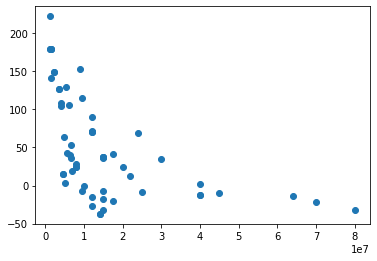

In [104]:
plt.scatter(forwards_2020_young_sorted['player_value'], forwards_2020_young_sorted['predicted_value_diff_percent'])

<AxesSubplot:xlabel='player_value', ylabel='predicted_value_diff_percent'>

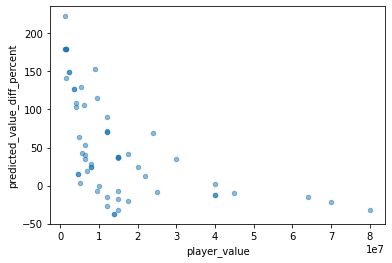

In [105]:
forwards_2020_young_sorted.plot.scatter(x="player_value", y="predicted_value_diff_percent", alpha=0.5)

In [107]:
players_stats_2020 = pd.read_sql_query("SELECT * from player_statistics as p " + \
                                        "WHERE p.year = {}".format(2020), cnx)
players_stats_2020.columns
player_names = players_stats_2020.iloc[:, [0, 1, 2, -2, -1]]
player_data = players_stats_2020.iloc[:, 3:-2]
print(player_names)
print(player_data)
print(player_data.columns)

     guid      first_name           second_name  now_cost element_type
0      13           Mesut                  Özil      67.0          MID
1     901        Sokratis      Papastathopoulos      48.0          DEF
2     569           David  Luiz Moreira Marinho      54.0          DEF
3     688  Pierre-Emerick            Aubameyang     113.0          MID
4     300          Cédric                Soares      46.0          DEF
..    ...             ...                   ...       ...          ...
686  1486         Andreas           Söndergaard      40.0           GK
687  1292         Patrick               Cutrone      59.0          FWD
688  1487           Nigel               Lonwijk      40.0          DEF
689  1488    Willian José              Da Silva      68.0          FWD
690  1489            Hugo                 Bueno      40.0          DEF

[691 rows x 5 columns]
     goals_scored  assists  total_points  minutes  goals_conceded  creativity  \
0               0        0             0   

In [110]:
# from sklearn import preprocessing

# x = player_data.values #returns a numpy array
# standard_scaler = preprocessing.StandardScaler()
# x_scaled = standard_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.293348,0.0
1,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.363670,0.0
2,-0.059154,-0.525829,0.066468,0.507614,0.493396,-0.415373,0.254186,-0.072224,-0.604829,0.345609,-0.074565,-0.009026,4.265495,-0.172637,-0.240606,0.0
3,3.115623,-0.032820,1.693992,1.240364,0.854328,0.897980,1.093847,2.546291,1.476529,0.810777,1.770484,1.075705,-0.234439,0.384803,1.060352,0.0
4,-0.456001,-0.032820,-0.220742,-0.155509,-0.156282,-0.045594,-0.357723,-0.317710,0.019579,-0.203625,-0.284109,-0.280209,-0.234439,-0.172637,-0.310928,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.328509,0.0
687,-0.456001,-0.525829,-0.843030,-0.952362,-0.950333,-0.655517,-0.864446,-0.584730,-0.604829,-0.876157,-0.799089,-0.822575,-0.234439,-0.730078,-0.381250,0.0
688,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.381250,0.0
689,-0.456001,-0.032820,-0.316478,-0.084776,-0.372841,0.073946,-0.661391,0.164648,-0.604829,-0.467033,-0.166907,0.262156,-0.234439,-0.730078,-0.346089,0.0


In [169]:
def get_index_for_player_guid(players, guid):
    player_id = players[(players['guid'] == guid)].index
    print(player_id)
    return player_id


from scipy.spatial import distance
def get_player_row(player_data, index):
    return player_data.iloc[index, :]

def get_distances_for_player(player_data, player):
    distances = dict()
    for index, row in player_data.iterrows():
        dist = distance.euclidean(player, row)
        distances[index] = dist
    return distances


def sort_dict_by_value(distances):
    return sorted(distances.items(), key=lambda x: x[1])

In [181]:
def divide_dataframe(players):
    names = players.iloc[:, [0, 1, 2, -2, -1]]
    stats = players.iloc[:, 3:-2]
    return names, stats

def find_closest_players_for_player_in_season(neighbours_season, players_df, guid, n=5):
    cnx = sqlite3.connect('Database/fpa-database.db')
    counter = 0
    index  = get_index_for_player_guid(players_df, guid)
        
    possible_neighbours = pd.read_sql_query("SELECT * from player_statistics as p " + \
                                        "WHERE p.year = {}".format(neighbours_season), cnx)
    
    possible_neighbours_names, possible_neighbours_stats = divide_dataframe(possible_neighbours)
    names, stats = divide_dataframe(players_df)
    
    
    try:
        index = index.tolist()[0]
    except:
        return dict()
    
    player_data = names.iloc[index, :]
    print(player_data)
    
    player_row = get_player_row(stats, index)
    distances = get_distances_for_player(possible_neighbours_stats, player_row)
    distances = sort_dict_by_value(distances)
    neighbours = dict()
    
    for i in range(1, len(distances)):
        ind = distances[i][0]
        player_data = (possible_neighbours_names.iloc[ind, :])
        neighbours[ind] = player_data
        counter = counter + 1 
        if counter == n:
            return neighbours

In [202]:
player_guid = pd.read_sql_query("SELECT guid from players as p " + \
                                        "WHERE p.first_name = \"{}\" AND p.second_name = \"{}\"".format("Fabio", "Silva"), cnx)
print(type(player_guid))
player_guid = player_guid.iloc[0, 0]
player_guid = int(player_guid)
player_guid
closest_players = find_closest_players_for_player_in_season(2016, players_stats_2020, guid=player_guid)
closest_players

<class 'pandas.core.frame.DataFrame'>
Int64Index([673], dtype='int64')
guid             1477
first_name      Fabio
second_name     Silva
now_cost         52.0
element_type      FWD
Name: 673, dtype: object


{310: guid                  310
 first_name            Jay
 second_name     Rodriguez
 now_cost             None
 element_type         None
 Name: 310, dtype: object,
 551: guid                551
 first_name      Stefano
 second_name       Okaka
 now_cost           None
 element_type       None
 Name: 551, dtype: object,
 404: guid                404
 first_name      Vincent
 second_name     Janssen
 now_cost           None
 element_type       None
 Name: 404, dtype: object,
 213: guid                  213
 first_name         Daniel
 second_name     Sturridge
 now_cost             None
 element_type         None
 Name: 213, dtype: object,
 642: guid                   642
 first_name          Manolo
 second_name     Gabbiadini
 now_cost              None
 element_type          None
 Name: 642, dtype: object}

In [161]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = midfielders.corr()
midfielders_corr = corr['player_value']

midfielders_corr = midfielders_corr.sort_values(ascending=False)
midfielders_corr

player_value               1.000000
current_value              0.745936
selected_by_percent        0.470791
ict_index                  0.437425
creativity                 0.419485
clean_sheets               0.410955
assists                    0.409382
influence                  0.397257
threat                     0.395082
total_points               0.387804
bonus                      0.374709
bps                        0.374180
goals_scored               0.338008
minutes                    0.236804
yellow_cards               0.094855
id                         0.091640
year                       0.051667
age                        0.042126
goals_conceded             0.011667
red_cards                 -0.075378
guid                      -0.118524
player_id_fpl             -0.118524
guid                      -0.118524
id                        -0.513899
id                        -0.519729
player_id_transfermarkt   -0.519729
Name: player_value, dtype: float64

In [191]:
attackers['predicted_value'] = predicted_prices

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [193]:
attackers.sort_values('predicted_value_diff_percent', ascending=False)

,guid,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,current_value,url,current_club_id,...,selected_by_percent,year,date_stamp,player_value,player_club,age,minutes_for_goal,predicted_value,predicted_value_diff,predicted_value_diff_percent
2720,594,208,594,Dominic Calvert-Lewin,1997-03-16 00:00:00,Centre-Forward,England,45.0,/dominic-calvert-lewin/profil/spieler/306024,8,...,0.1,2016,2016-05-30 00:00:00,100000,Sheffield United,19,347,7.324145e+06,7.224145e+06,7224.145261
10,535,301,535,Ryan Fraser,1994-02-24 00:00:00,Left Winger,Scotland,12.0,/ryan-fraser/profil/spieler/146795,12,...,1.2,2016,2016-04-20 00:00:00,500000,Ipswich Town,22,588,1.481031e+07,1.431031e+07,2862.061993
501,535,301,535,Ryan Fraser,1994-02-24 00:00:00,Left Winger,Scotland,12.0,/ryan-fraser/profil/spieler/146795,12,...,1.2,2016,2016-08-01 00:00:00,500000,AFC Bournemouth,22,588,1.481031e+07,1.431031e+07,2862.061993
2338,545,461,545,Oliver McBurnie,1996-06-04 00:00:00,Centre-Forward,Scotland,12.0,/oliver-mcburnie/profil/spieler/298477,18,...,1.7,2017,2017-06-28 00:00:00,250000,Swansea City,21,999,6.845638e+06,6.595638e+06,2638.255297
1548,20,205,20,Alex Iwobi,1996-05-03 00:00:00,Left Winger,Nigeria,22.0,/alex-iwobi/profil/spieler/242631,8,...,1.1,2016,2016-02-09 00:00:00,1000000,Arsenal FC,20,485,2.047552e+07,1.947552e+07,1947.551878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,1368,182,1368,Cengiz Ünder,1997-07-14 00:00:00,Right Winger,Turkey,20.0,/cengiz-under/profil/spieler/341647,7,...,0.0,2020,2020-03-03 00:00:00,30000000,AS Roma,23,999,7.223979e+06,-2.277602e+07,-75.920069
124,1271,129,1271,Steven Bergwijn,1997-10-08 00:00:00,Left Winger,Netherlands,25.0,/steven-bergwijn/profil/spieler/284165,5,...,0.4,2020,2020-04-08 00:00:00,28000000,Tottenham Hotspur,23,999,6.599064e+06,-2.140094e+07,-76.431915
2822,1271,129,1271,Steven Bergwijn,1997-10-08 00:00:00,Left Winger,Netherlands,25.0,/steven-bergwijn/profil/spieler/284165,5,...,0.4,2020,2020-10-13 00:00:00,28000000,Tottenham Hotspur,23,999,6.599064e+06,-2.140094e+07,-76.431915
2749,238,24,238,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,Argentina,25.0,/sergio-aguero/profil/spieler/26399,1,...,1.4,2020,2020-10-13 00:00:00,42000000,Manchester City,32,370,9.218747e+06,-3.278125e+07,-78.050602


In [89]:
corr = center_defenders.corr()
center_defenders_corr = corr['player_value']

center_defenders_corr = center_defenders_corr.sort_values(ascending=False)
center_defenders_corr 

player_value               1.000000
current_value              0.715567
selected_by_percent        0.475555
clean_sheets               0.361016
total_points               0.347257
bps                        0.315063
bonus                      0.258786
minutes                    0.219304
ict_index                  0.215778
influence                  0.211215
goals_scored               0.200230
threat                     0.196649
creativity                 0.130302
assists                    0.113741
year                       0.066293
yellow_cards               0.034782
goals_conceded             0.012339
red_cards                 -0.035757
age                       -0.118709
guid                      -0.158356
player_id_fpl             -0.158356
guid                      -0.158356
player_id_transfermarkt   -0.512198
Name: player_value, dtype: float64

In [90]:
corr = goalkeepers.corr()
goalkeepers_corr = corr['player_value']

goalkeepers_corr = goalkeepers_corr.sort_values(ascending=False)
goalkeepers_corr 

player_value               1.000000
current_value              0.634860
clean_sheets               0.508005
minutes                    0.488622
total_points               0.474828
bps                        0.457557
influence                  0.412035
ict_index                  0.407274
selected_by_percent        0.400957
goals_conceded             0.384861
bonus                      0.246162
yellow_cards               0.217781
red_cards                  0.181748
creativity                 0.037687
assists                   -0.000657
threat                    -0.014800
goals_scored              -0.016874
year                      -0.045916
age                       -0.128639
guid                      -0.217516
player_id_fpl             -0.217516
guid                      -0.217516
player_id_transfermarkt   -0.312200
Name: player_value, dtype: float64